In [4]:
import numpy as np

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum( (x1-x2)**2 ))

In [8]:
# 데이터 준비
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [10]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [28]:
# 데이터셋 구조 확인해보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
# Label 확인해보기
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
# 어떤 특성들이 있는지 확인해보기
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


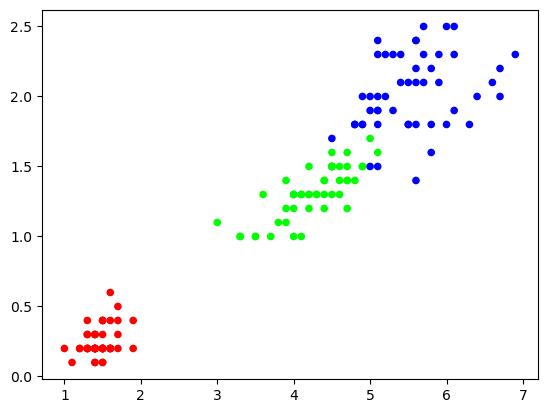

In [16]:
# Petal Length, Width로 Scatter 찍어보기
plt.scatter(
    X[:,2], X[:,3],
    c=y,
    cmap=cmap,
    s=20
)
plt.show()

In [18]:
# Train set, Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234
)

In [24]:
# 테스트셋 데이터 1개로 Distance 구해보기
x = X_test[0]
x

array([6.1, 3. , 4.6, 1.4])

In [36]:
distances = [euclidean_distance(x, x_train) for x_train in X_train]
distances

[1.9748417658131496,
 0.5000000000000003,
 3.6823905279043934,
 0.5830951894845302,
 0.7810249675906661,
 3.252691193458118,
 3.818376618407356,
 3.2403703492039293,
 4.124318125460256,
 1.884144368141677,
 3.5972211497209896,
 0.8185352771872448,
 3.6496575181789312,
 1.3076696830622023,
 1.8357559750685826,
 3.5707142142714243,
 1.174734012447073,
 1.2369316876852987,
 2.37065391822594,
 1.5394804318340654,
 3.622154055254966,
 0.9380831519646865,
 2.596150997149434,
 0.34641016151377546,
 1.9104973174542794,
 1.1269427669584642,
 0.5196152422706631,
 0.8660254037844396,
 0.5196152422706631,
 3.563705936241092,
 3.494281041931229,
 2.056696380120314,
 0.9643650760992954,
 0.9000000000000002,
 3.478505426185217,
 3.671511950137164,
 3.59583091927304,
 0.8366600265340758,
 1.0816653826391964,
 1.0770329614269007,
 1.6941074346097422,
 0.4690415759823425,
 3.640054944640259,
 0.9591663046625443,
 3.4684290392049246,
 2.7349588662354694,
 3.5679125549822546,
 0.19999999999999973,
 0.7141

In [58]:
# 계산된 거리값을 오름차순으로 정렬한 배열인덱스 가져오기
indicies = np.argsort(distances)
indicies

array([ 47,  23,  65,  54,  41,  55,   1, 105,  28,  26,  64,  99,  77,
         3,  74,  59,  66,  62,  86,  93,  58,  70,  48, 103,  79,  50,
        60,   4,  11,  76,  73,  37,  87,  27,  33,  80, 104,  21,  43,
        32,  71,  75, 107, 116,  39,  38, 117,  25,  16,  91, 106,  17,
        52, 100,  89,  13,  53,  83,  84, 108, 112,  98,  63,  19,  92,
       109,  40, 115,  14,   9,  85,  24,   0,  31,  90,  18,  22,  45,
       110,  61, 114,  56,   7,   5,  49,  72, 111,  44,  82,  34, 113,
        30,  51,  95, 101,  81,  29,  46,  15,  36,  10,  57,  20,  69,
        68,  42,  97,  12,  35,   2,  94, 102, 119,  88,  96,   6,  67,
       118,   8,  78])

In [60]:
# 정렬된 인덱스에서 첫 k개만 남기기
K = 5
indicies = indicies[:K]
indicies

array([47, 23, 65, 54, 41])

In [62]:
labels = [y_train[i] for i in indicies]
labels

[1, 1, 1, 2, 1]

In [64]:
# 0번째 테스트값의 Label 확인해보기
print(y_test[0])

1


In [70]:
# 가까운 K개의 포인트들의 이름 확인해보기
print(iris.target_names[labels])

['versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor']


In [78]:
# 가까운 이웃들 분류별로 카운트해보기
from collections import Counter
counts = Counter(labels)
counts

Counter({1: 4, 2: 1})

In [81]:
# 카운트 결과에서 데이터가 많은 순으로 정렬된 배열 가져오기
sorted_count = counts.most_common()
sorted_count

[(1, 4), (2, 1)]

In [83]:
# sorted_count에서 첫번째 항목이 예측값
# [(1, 4), (2, 1)] -> (1,4) 1은 예측값, 4는 1이 나온 횟수
predicted_label = sorted_count[0][0]
print(predicted_label)
print(iris.target_names[predicted_label])

1
versicolor


In [85]:
# 이제 테스트데이터 전체를 사용하여 예측을 해보자
# 1개 데이터에 대해 예측값을 가져오는 함수 만들기
def predict(x):
    distances = [euclidean_distance(x, x_train) for x_train in X_train]

    # 거리값들을 오름차순으로 정렬한 인덱스 가져오기
    indicies = np.argsort(distances)

    # 가장 가까운 K개만 남기기
    indicies = indicies[:K]

    # 훈련세트의 Labels에서 가장 가까운것들만 가져오기
    labels = [y_train[i] for i in indicies]

    # labels 카운트해보기
    counts = Counter(labels)

    # 카운트 정렬해서 첫번째 항목의 y값만 꺼내오기
    # 정렬전 counts: Counter({1: 4, 2: 1})
    # most_common() 함수로 정렬한 결과: [(1, 4), (2, 1)]
    # predicted_label = 1
    predicted_label = counts.most_common()[0][0] 
    return predicted_label

In [87]:
# 테스트 셋 전체 값의 예측값 가져오기
predicts = [predict(x) for x in X_test]
predicts

[1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 0]

In [89]:
# 테스트셋의 y값과 예측결과 비교해보기
ret = y_test == predicts
ret

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [91]:
# 예측 정확도 계산해보기
score = np.sum(predicts == y_test) / len(y_test)
print(score)

0.9666666666666667
